Sentimental Analysis, utilizing python 🐍 and assignment_3's newsdata.io articles.

In [1]:
from textblob import TextBlob
from newsdataapi import NewsDataApiClient
import matplotlib.pyplot as plt
from config import API_KEY

In [2]:
# # API key authorization, Initialize the client with your API key
api = NewsDataApiClient(apikey=API_KEY)

Breaking down few options for var response + id to retrieve certain keyword articles utilizing newsdata.io

In [3]:
# News API
responseRW = api.news_api(q="ransomware", country="us")
responseLB = api.news_api(q="lockbit", country="us")
responseChr = api.news_api(q="christmas", country="us")

In [4]:
# Creating an empty list for analysis taken from the response
articlesRW = []
articlesLB = []
articlesChr = []

for result in responseRW['results']:
    articlesRW.append({
        'title': result['title'],
        'link': result['link'],
        'description': result['description'],
        'pubDate': result['pubDate'],
        'source': result['source_id'],
        'category': result['category'],
        'country': result['country'],
        'language': result['language']
    })

for result in responseLB['results']:
    articlesLB.append({
        'title': result['title'],
        'link': result['link'],
        'description': result['description'],
        'pubDate': result['pubDate'],
        'source': result['source_id'],
        'category': result['category'],
        'country': result['country'],
        'language': result['language']
    })

for result in responseChr['results']:
    articlesChr.append({
        'title': result['title'],
        'link': result['link'],
        'description': result['description'],
        'pubDate': result['pubDate'],
        'source': result['source_id'],
        'category': result['category'],
        'country': result['country'],
        'language': result['language']
    })

In [5]:
# Testing the data
print(responseRW)
print(responseLB)
print(responseChr)

{'status': 'success', 'totalResults': 22, 'results': [{'article_id': '44a1675b48b5a99e08b2233529b9cc11', 'title': 'DataCore Recognized in the 2023 Gartner Magic Quadrant for Distributed File Systems and Object Storage Report', 'link': 'https://www.sportsvideo.org/2023/11/16/datacore-recognized-in-the-2023-gartner-magic-quadrant-for-distributed-file-systems-and-object-storage-report/', 'keywords': ['Business', '2023 Gartner Magic Quadrant', 'DataCor', 'DataCore Swarm', 'Perifery'], 'creator': ['SVG Staff'], 'video_url': None, 'description': 'DataCore Software announces that it has been recognized in the 2023 Gartner Magic Quadrant for Distributed File Systems and Object Storage1. "In the face of continued uncertainty in market conditions, IT leaders are putting even greater emphasis on cost-efficient, scalable, and versatile solutions to address key data challenges. These include rapid growth of unstructured data across disparate silos, management complexity, cyberthreats and ransomware

Testing the articles[]

In [6]:
print('First Ransomware array list:')
print(articlesRW)
print('Next LockBIT array list:')
print(articlesLB)
print('Next Christmas array list:')
print(articlesChr)

First Ransomware array list:
[{'title': 'DataCore Recognized in the 2023 Gartner Magic Quadrant for Distributed File Systems and Object Storage Report', 'link': 'https://www.sportsvideo.org/2023/11/16/datacore-recognized-in-the-2023-gartner-magic-quadrant-for-distributed-file-systems-and-object-storage-report/', 'description': 'DataCore Software announces that it has been recognized in the 2023 Gartner Magic Quadrant for Distributed File Systems and Object Storage1. "In the face of continued uncertainty in market conditions, IT leaders are putting even greater emphasis on cost-efficient, scalable, and versatile solutions to address key data challenges. These include rapid growth of unstructured data across disparate silos, management complexity, cyberthreats and ransomware, and difficulty in deriving value from their data." DataCore Swarm revolutionizes and streamlines IT operations, offering a single scalable platform to manage a multitude of data workloads. This software-defined, all

Next we use sentiment analysis on the datas. 

In [7]:
# Creating empty lists to store sentiment scores
sentiment_scoresRW = []
sentiment_scoresLB = []
sentiment_scoresChr = []

# Iterate 'description' of articles[] and calculate the sentiment score for each
for article in articlesRW:
    if article['description']:
        # Analyze the text of the description
        sentiment = TextBlob(article['description'])
        sentiment_score = sentiment.sentiment.polarity
        sentiment_scoresRW.append(sentiment_score)
    else:
        # Set a default sentiment score for articles without a description
        sentiment_scoresRW.append(0.0)

for article in articlesLB:
    if article['description']:
        # Analyze the text of the description
        sentiment = TextBlob(article['description'])
        sentiment_score = sentiment.sentiment.polarity
        sentiment_scoresLB.append(sentiment_score)
    else:
        # Set a default sentiment score for articles without a description
        sentiment_scoresLB.append(0.0)

for article in articlesChr:
    if article['description']:
        # Analyze the text of the description
        sentiment = TextBlob(article['description'])
        sentiment_score = sentiment.sentiment.polarity
        sentiment_scoresChr.append(sentiment_score)
    else:
        # Set a default sentiment score for articles without a description
        sentiment_scoresChr.append(0.0)

Ransomware:

In [8]:
print("Ransomware articles:")
for i in range(len(articlesRW)):
    print(articlesRW[i]['title'])
    print('Sentiment score:', sentiment_scoresRW[i])
    print('-----------------------------------------')

Ransomware articles:
DataCore Recognized in the 2023 Gartner Magic Quadrant for Distributed File Systems and Object Storage Report
Sentiment score: 0.17889610389610386
-----------------------------------------
Ransomware group reports victim it breached to SEC regulators
Sentiment score: -0.08750000000000001
-----------------------------------------
Ransomware gang files complaint with SEC complaining victim didn’t promptly announce breach
Sentiment score: -0.005878787878787888
-----------------------------------------
Chargehub & Irdeto Bring Secure EV Charging To Market Faster
Sentiment score: 0.325
-----------------------------------------
The Persistent Menace: Understanding And Combating Ransomware
Sentiment score: 0.0
-----------------------------------------
Millions of patients have data stolen after medical transcription service hacked
Sentiment score: 0.0
-----------------------------------------
Royal Mail spent £10m on cyber measures after LockBit attack
Sentiment score: 0.

Ransomware graphs:

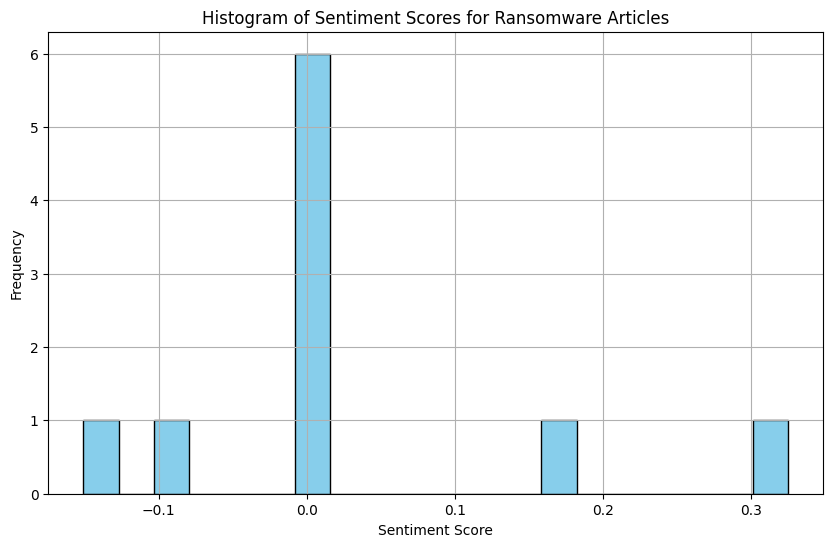

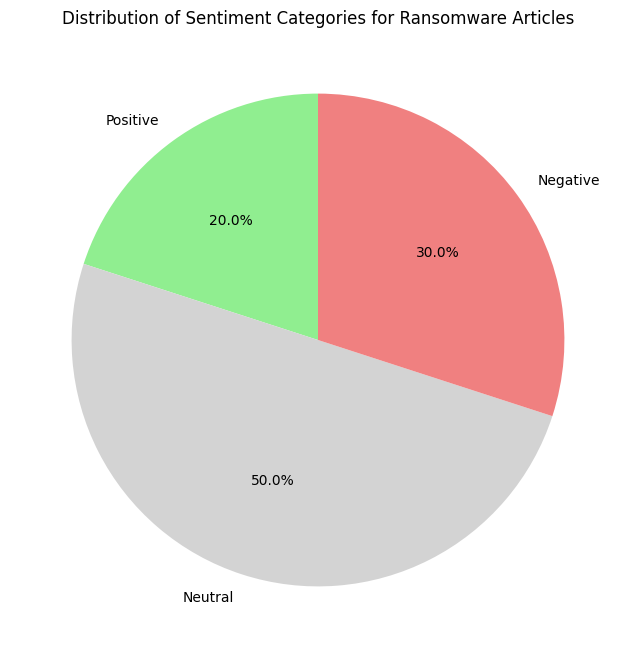

In [9]:
# Plotting histogram for sentiment scores of Ransomware articles
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scoresRW, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Scores for Ransomware Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting pie chart for sentiment categories
positive_sentiment_count = sum(score > 0 for score in sentiment_scoresRW)
neutral_sentiment_count = sum(score == 0 for score in sentiment_scoresRW)
negative_sentiment_count = sum(score < 0 for score in sentiment_scoresRW)

labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_sentiment_count, neutral_sentiment_count, negative_sentiment_count]
colors = ['lightgreen', 'lightgray', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Categories for Ransomware Articles')
plt.show()

LockBit:

In [10]:
print("LockBit articles:")
for i in range(len(articlesLB)):
    print(articlesLB[i]['title'])
    print('Sentiment score:', sentiment_scoresLB[i])
    print('-----------------------------------------')

LockBit articles:
Royal Mail spent £10m on cyber measures after LockBit attack
Sentiment score: 0.0
-----------------------------------------
The challenges and solutions of bandwidth demands in modern healthcare organizations
Sentiment score: 0.15484530403885244
-----------------------------------------
Accelerating medical device manufacturing through simulation
Sentiment score: 0.19134012539184952
-----------------------------------------
US government reinforces ICBC hack link to Citrix Bleed
Sentiment score: 0.0
-----------------------------------------
Danish Energy Attacks Portend Targeting More Critical Infrastructure
Sentiment score: 0.09090909090909091
-----------------------------------------


LockBit graph:

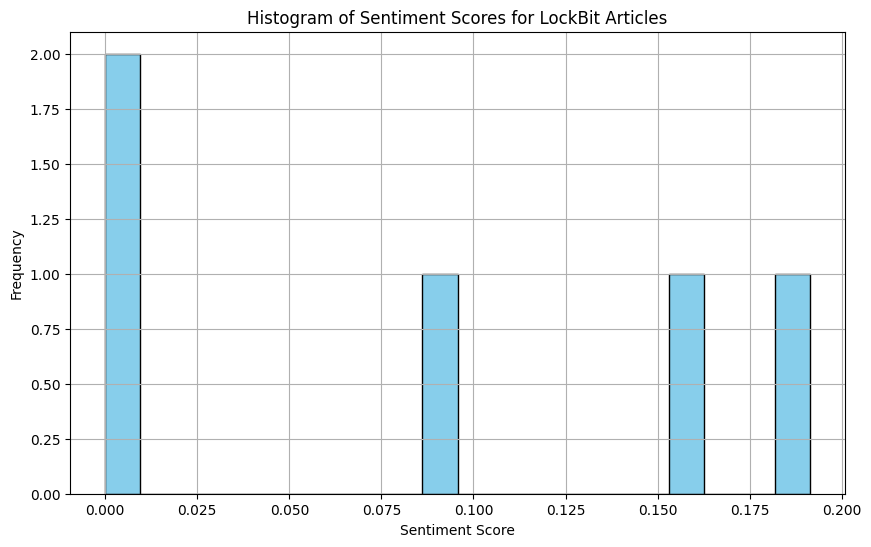

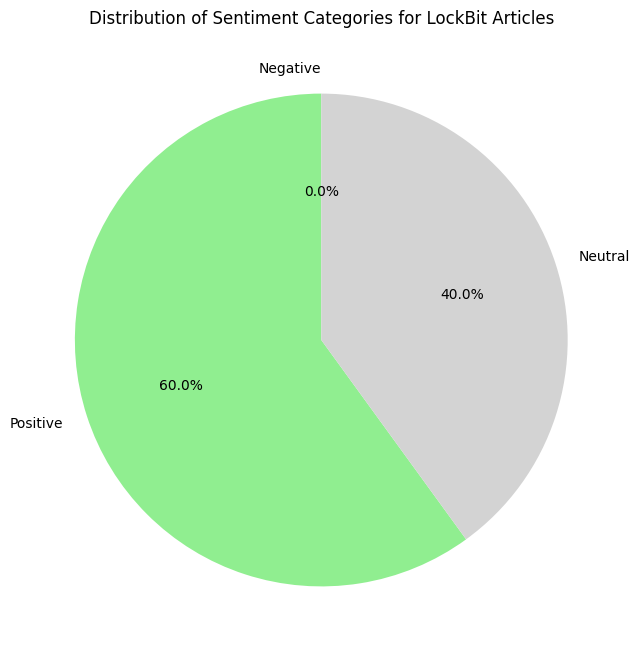

In [11]:
# Plotting histogram for sentiment scores of LockBit articles
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scoresLB, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Scores for LockBit Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting pie chart for sentiment categories of LockBit articles
positive_sentiment_count_lb = sum(score > 0 for score in sentiment_scoresLB)
neutral_sentiment_count_lb = sum(score == 0 for score in sentiment_scoresLB)
negative_sentiment_count_lb = sum(score < 0 for score in sentiment_scoresLB)

labels_lb = ['Positive', 'Neutral', 'Negative']
sizes_lb = [positive_sentiment_count_lb, neutral_sentiment_count_lb, negative_sentiment_count_lb]
colors_lb = ['lightgreen', 'lightgray', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes_lb, labels=labels_lb, colors=colors_lb, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Categories for LockBit Articles')
plt.show()

Christmas:

In [12]:
print("Christmas articles:")
for i in range(len(articlesChr)):
    print(articlesChr[i]['title'])
    print('Sentiment score:', sentiment_scoresChr[i])
    print('-----------------------------------------')

Christmas articles:
Don’t let these 3 November hidden streaming movie gems fly under your radar
Sentiment score: 0.0
-----------------------------------------
Men Did The Unthinkable And Told Us What They Actually Want For Christmas
Sentiment score: -0.225
-----------------------------------------
Make your own beauty Advent calendar: and get stuff you really want | Sali Hughes on beauty
Sentiment score: 0.2531986531986532
-----------------------------------------
Forcing medical staff to work during strikes could harm care, NHS Providers says
Sentiment score: 0.10596590909090908
-----------------------------------------
4 Bedroom Home in Helena - $585,000
Sentiment score: 0.3215909090909091
-----------------------------------------
Dates Set for Winter Wonderland at Kuser Park in Hamilton, NJ
Sentiment score: 0.5
-----------------------------------------
New Restaurant Opening Soon on Farnsworth Avenue in Bordentown City, NJ
Sentiment score: -0.2
--------------------------------------

Christmas graph:

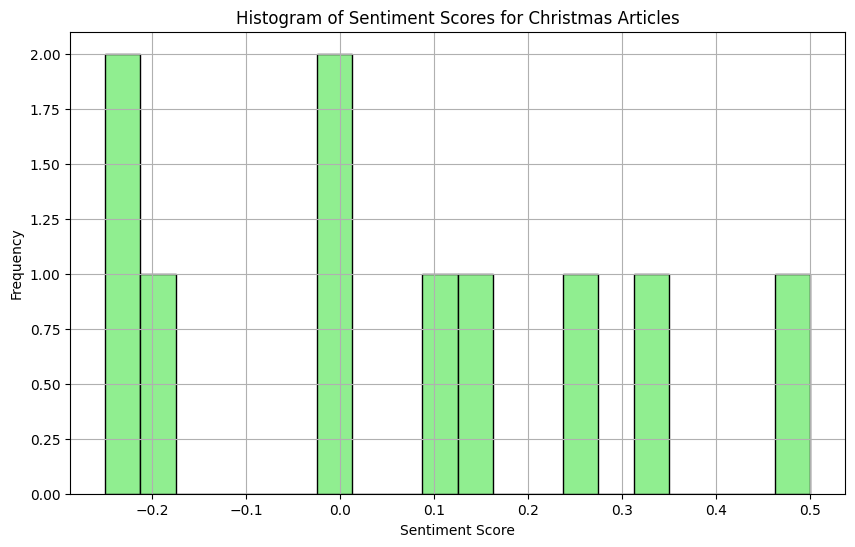

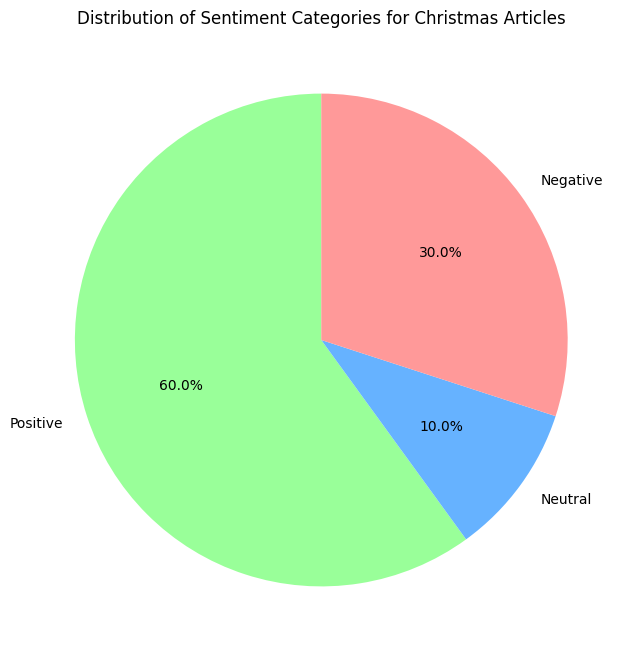

In [13]:
# ... (your existing code for articlesChr and sentiment_scoresChr)

# Plotting histogram for sentiment scores of Christmas articles
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scoresChr, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Sentiment Scores for Christmas Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting pie chart for sentiment categories of Christmas articles
positive_sentiment_count_chr = sum(score > 0 for score in sentiment_scoresChr)
neutral_sentiment_count_chr = sum(score == 0 for score in sentiment_scoresChr)
negative_sentiment_count_chr = sum(score < 0 for score in sentiment_scoresChr)

labels_chr = ['Positive', 'Neutral', 'Negative']
sizes_chr = [positive_sentiment_count_chr, neutral_sentiment_count_chr, negative_sentiment_count_chr]
colors_chr = ['#99ff99', '#66b2ff', '#ff9999']  # Christmas-themed colors

plt.figure(figsize=(8, 8))
plt.pie(sizes_chr, labels=labels_chr, colors=colors_chr, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Categories for Christmas Articles')
plt.show()
